# Covid 19 Prediction Model :

Covid 19 is not just a disease like fever or cold . Humanity after 1920 never saw any pandemic with this kind of devastation but then 2020 comes and the world certainly stops for almost 2 years . Millions of People had died due do this disease and the economy was stagnant .

But think if we can predict the disease just by getting some basic information then how much better it could be . In this Project i have predicted the covid positive or negative just by getting some important features . By the help of data analysis and data visualization i have got some very important factors which increase or decrease the chances of getting covid positive . Like People with age of more than 60 has a pretty higher chance of getting covid . So , predicting a disease accurately can drastically change the healthcare system and will prepare us for future pandemic.

If a machine can predict a disease accurately then the test time will be saved , the treatment will be more fast and robust . People don't have to be in a queue to do the tests if healthcare industry carefully inducts Machine Learning and Data analysis .

In this project i have done all the required steps to get the best insights   and the best accuracy . I have achieved a accuracy score of 96.09% in this project . It has multiple ML algos which can be used for different use cases . Please have a look share your thoughts on this Project .

In [ ]:
import numpy as np ## Importing numpy library for data analysis .
import pandas as pd ## Importing Pandas library for data analysis .
import matplotlib.pyplot as plt ## Importing matplotlib library for data visualization .
import seaborn as sns  ## Importing seaborn library for data visualization .
import plotly.express as px ## Importing plotly express for advance data visualization .

In [ ]:
Covid_raw=pd.read_csv("/content/corona_tested_006.csv")
covid=Covid_raw.copy() ## Create a copy of our dataset for further analysis .
covid.head() ## head function will show us the top 5 rows .

<ipython-input-124-0ebc75bc3f42>:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  Covid_raw=pd.read_csv("/content/corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [ ]:
covid.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
new_covid=covid.drop(['Test_date','Ind_ID'],axis=1) ## Dropping some unnecessary columns with drop function .

In [ ]:
new_covid.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       278596 non-null  object
 1   Fever                278596 non-null  object
 2   Sore_throat          278847 non-null  object
 3   Shortness_of_breath  278847 non-null  object
 4   Headache             278847 non-null  object
 5   Corona               278848 non-null  object
 6   Age_60_above         151528 non-null  object
 7   Sex                  259285 non-null  object
 8   Known_contact        278848 non-null  object
dtypes: object(9)
memory usage: 19.1+ MB


In [ ]:
new_covid.head() ## head function will show us the top 5 rows .

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,negative,NaN,NaN,Abroad
1,False,True,False,False,False,positive,NaN,NaN,Abroad
2,False,True,False,False,False,positive,NaN,NaN,Abroad
3,True,False,False,False,False,negative,NaN,NaN,Abroad
4,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


Creating a for loop which will show total count of each distinct values by using seaborn countplot . Here we will also see every columns
value_counts and total percentage of each each distinct values that is present in that column .

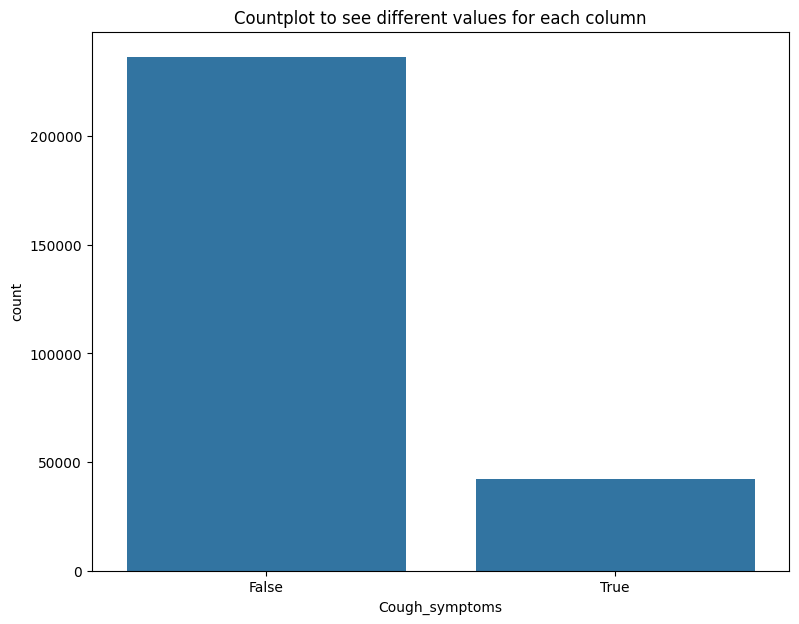

Cough_symptoms
False    236368
True      42228
Name: count, dtype: int64
Percentage of values in each column : Cough_symptoms
False    84.765894
True     15.143734
Name: count, dtype: float64


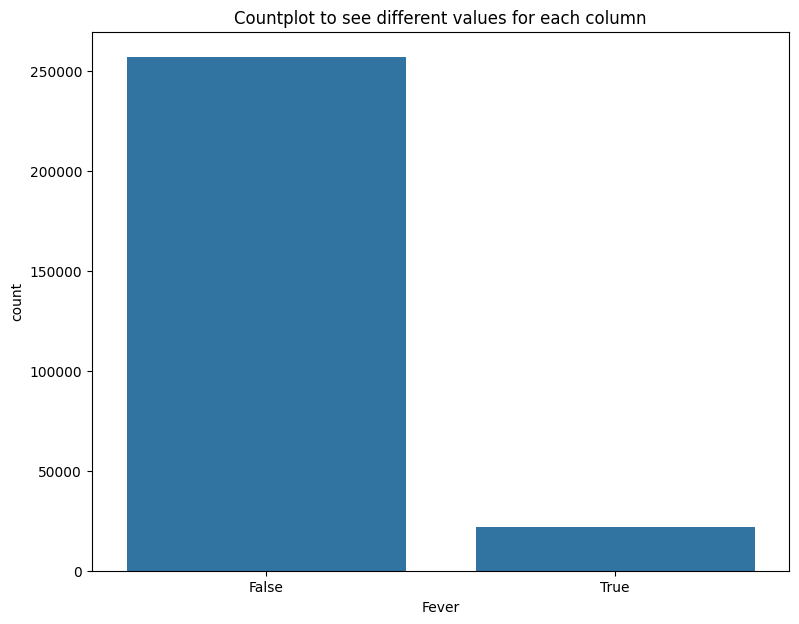

Fever
False    256844
True      21752
Name: count, dtype: int64
Percentage of values in each column : Fever
False    92.108963
True      7.800666
Name: count, dtype: float64


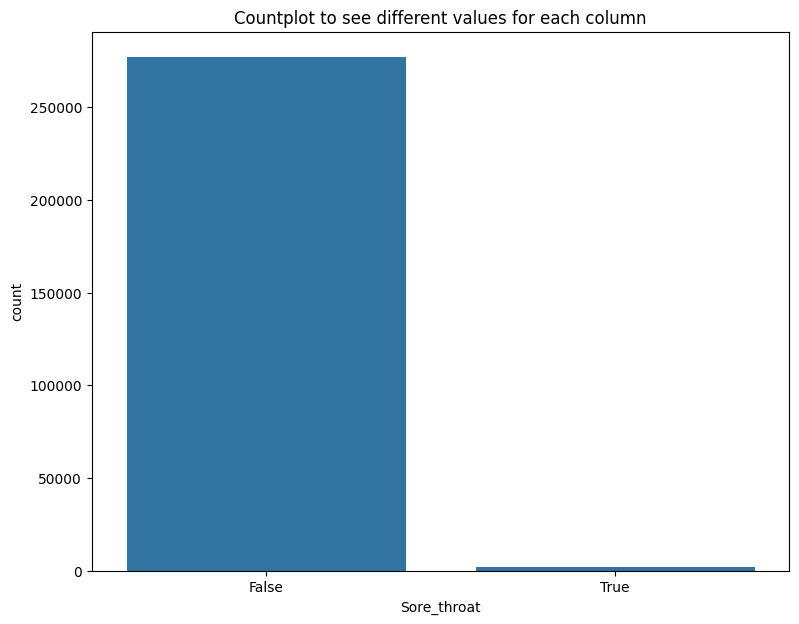

Sore_throat
False    276921
True       1926
Name: count, dtype: int64
Percentage of values in each column : Sore_throat
False    99.308943
True      0.690699
Name: count, dtype: float64


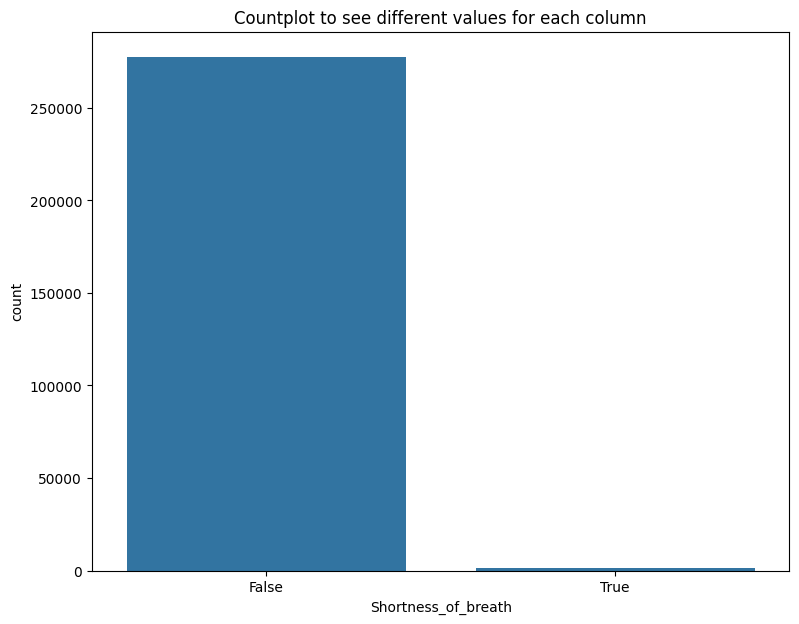

Shortness_of_breath
False    277270
True       1577
Name: count, dtype: int64
Percentage of values in each column : Shortness_of_breath
False    99.434100
True      0.565541
Name: count, dtype: float64


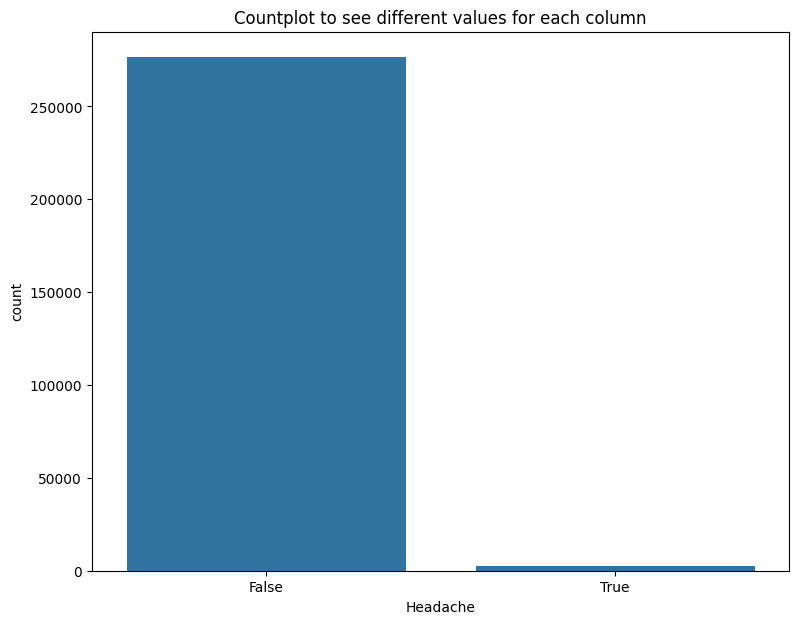

Headache
False    276433
True       2414
Name: count, dtype: int64
Percentage of values in each column : Headache
False    99.133937
True      0.865705
Name: count, dtype: float64


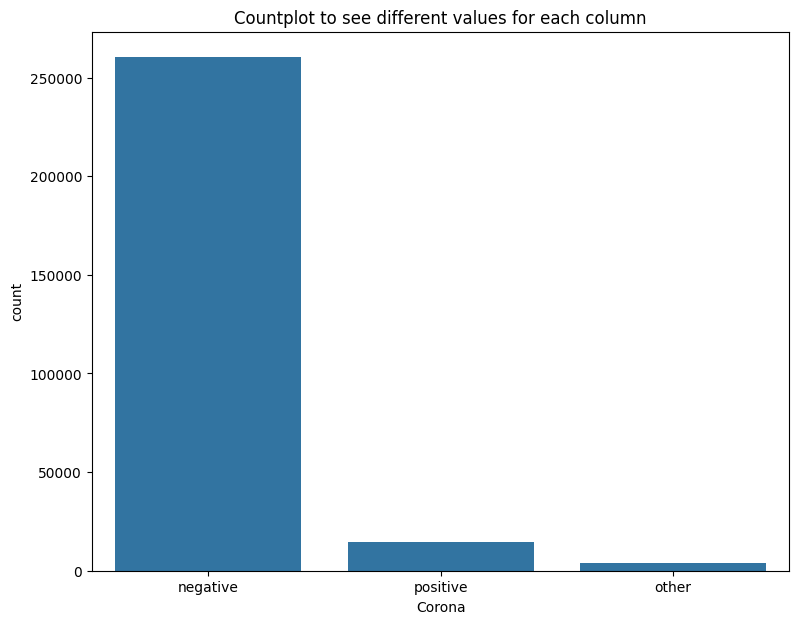

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64
Percentage of values in each column : Corona
negative    93.322168
positive     5.282089
other        1.395742
Name: count, dtype: float64


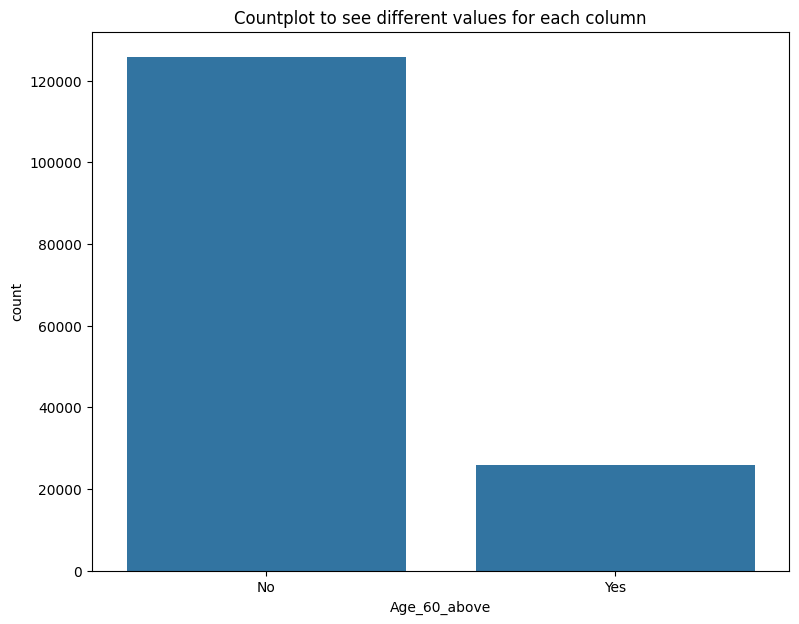

Age_60_above
No     125703
Yes     25825
Name: count, dtype: int64
Percentage of values in each column : Age_60_above
No     45.079398
Yes     9.261318
Name: count, dtype: float64


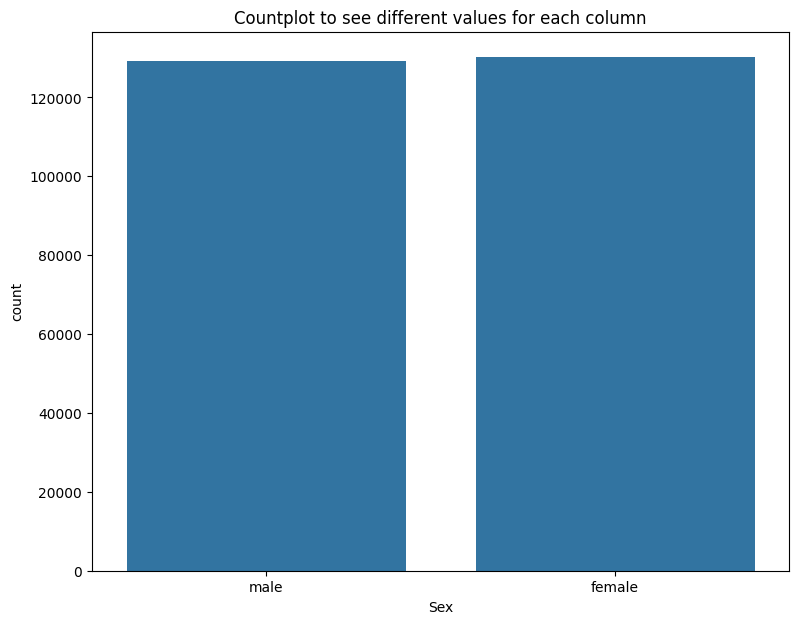

Sex
female    130158
male      129127
Name: count, dtype: int64
Percentage of values in each column : Sex
female    46.677043
male      46.307307
Name: count, dtype: float64


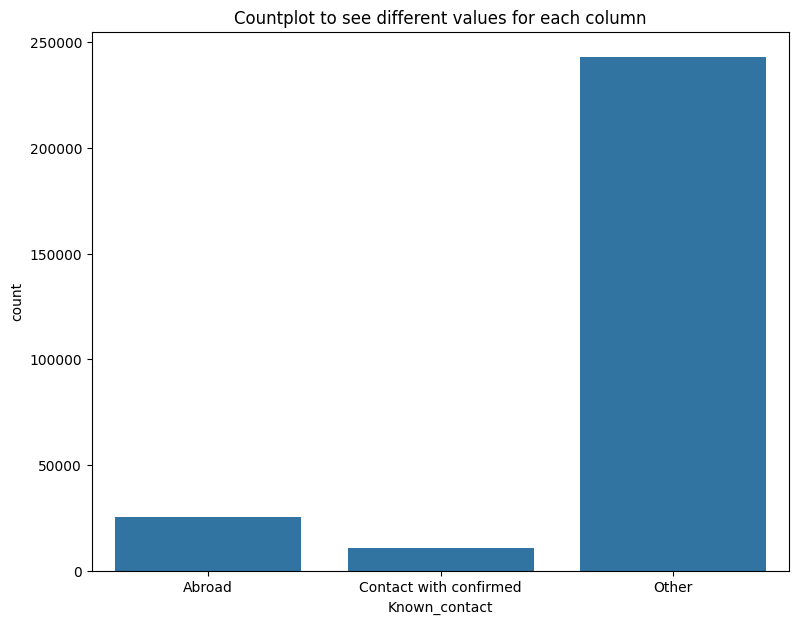

Known_contact
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64
Percentage of values in each column : Known_contact
Other                     87.051368
Abroad                     9.133291
Contact with confirmed     3.815340
Name: count, dtype: float64


In [ ]:
for i in new_covid.columns :
  plt.figure(figsize=(9,7))
  sns.countplot(data=new_covid,x=i)
  plt.title("Countplot to see different values for each column")
  plt.show()
  print(new_covid[i].value_counts())
  print("Percentage of values in each column :", (covid[i].value_counts()*100)/len(covid[i]))

After watching all the visuals i can see there are some columns which has nan or null or some unwanted values . after dropping those nan or null values i will do one more visualization to get the best insights .

In [ ]:
covid.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [ ]:
covid.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [ ]:
covid.Fever.value_counts() ## value_counts() will show the total count for each distinct value .

Fever
False    256844
True      21752
Name: count, dtype: int64

In [ ]:
covid=covid.dropna() ## dropna function will drop all the nan or null values .

In [ ]:
covid.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13731,13732,22-03-2020,False,False,False,False,False,other,No,female,Other
13732,13733,22-03-2020,False,False,False,False,False,other,No,female,Other


In [ ]:
covid.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
covid['Test_date']=pd.to_datetime(covid['Test_date'],errors='coerce') ## Converting 'Test_date' column into datetime column using pd.to_datetime function .

<ipython-input-137-f3747cd1884f>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid['Test_date']=pd.to_datetime(covid['Test_date'],errors='coerce')


In [ ]:
covid.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
Index: 138172 entries, 13727 to 156039
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               138172 non-null  int64         
 1   Test_date            138172 non-null  datetime64[ns]
 2   Cough_symptoms       138172 non-null  object        
 3   Fever                138172 non-null  object        
 4   Sore_throat          138172 non-null  object        
 5   Shortness_of_breath  138172 non-null  object        
 6   Headache             138172 non-null  object        
 7   Corona               138172 non-null  object        
 8   Age_60_above         138172 non-null  object        
 9   Sex                  138172 non-null  object        
 10  Known_contact        138172 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 12.7+ MB


In [ ]:
covid.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,2020-03-22,True,False,False,False,False,negative,No,male,Abroad
13728,13729,2020-03-22,True,False,False,False,False,negative,No,female,Abroad
13730,13731,2020-03-22,True,True,False,False,False,positive,Yes,female,Other
13731,13732,2020-03-22,False,False,False,False,False,other,No,female,Other
13732,13733,2020-03-22,False,False,False,False,False,other,No,female,Other


Creating day, month, year and month_name column from Test_date column using dt.() function .

In [ ]:
covid['Test_day']=covid['Test_date'].dt.day
covid['Test_month']=covid['Test_date'].dt.month
covid['Year']=covid['Test_date'].dt.year
covid['month_name']=covid['Test_date'].dt.month_name()

In [ ]:
covid.head()  ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_day,Test_month,Year,month_name
13727,13728,2020-03-22,True,False,False,False,False,negative,No,male,Abroad,22,3,2020,March
13728,13729,2020-03-22,True,False,False,False,False,negative,No,female,Abroad,22,3,2020,March
13730,13731,2020-03-22,True,True,False,False,False,positive,Yes,female,Other,22,3,2020,March
13731,13732,2020-03-22,False,False,False,False,False,other,No,female,Other,22,3,2020,March
13732,13733,2020-03-22,False,False,False,False,False,other,No,female,Other,22,3,2020,March


In [ ]:
covid.Corona.value_counts() ## value_counts() will show the total count for each distinct value .

Corona
negative    125668
positive     10626
other         1878
Name: count, dtype: int64

Corona report can be positive or negative , it can't be other . that is why converting all the other into nan or null values .

In [ ]:
covid.Corona[covid.Corona=='other']=np.nan

<ipython-input-144-60eba042c1c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.Corona[covid.Corona=='other']=np.nan


In [ ]:
covid=covid.dropna() ## dropna function will drop all the nan or null values .
covid.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
Test_day               0
Test_month             0
Year                   0
month_name             0
dtype: int64

In [ ]:
covid_new=covid.drop(['Ind_ID','Test_date','Test_month','Test_day','Year'],axis=1) ## Dropping some unnecessary columns with drop function .

Creating a for loop which will show total count of each distinct values by using seaborn countplot . Here we will also see every columns
value_counts and total percentage of each each distinct values that is present in that column .

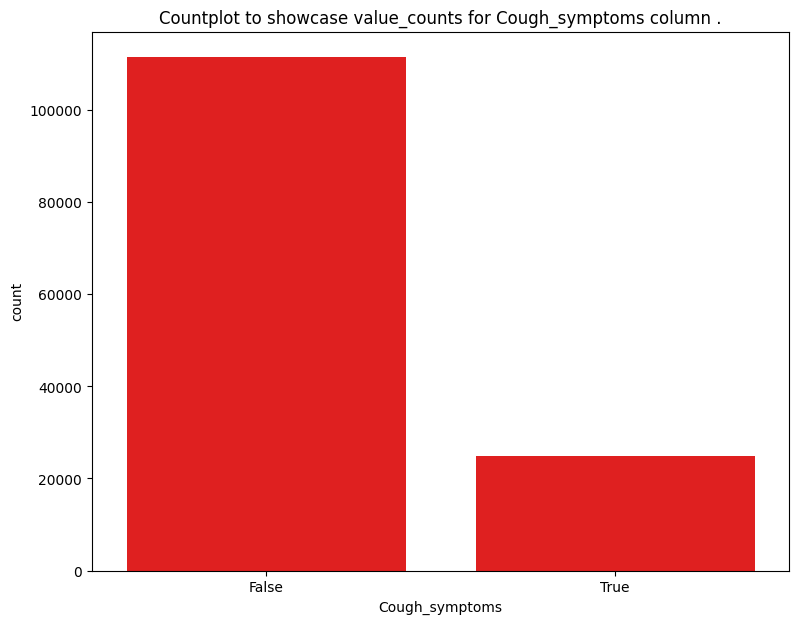

Cough_symptoms
False    111443
True      24851
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Cough_symptoms column .
Cough_symptoms
False    81.766622
True     18.233378
Name: count, dtype: float64


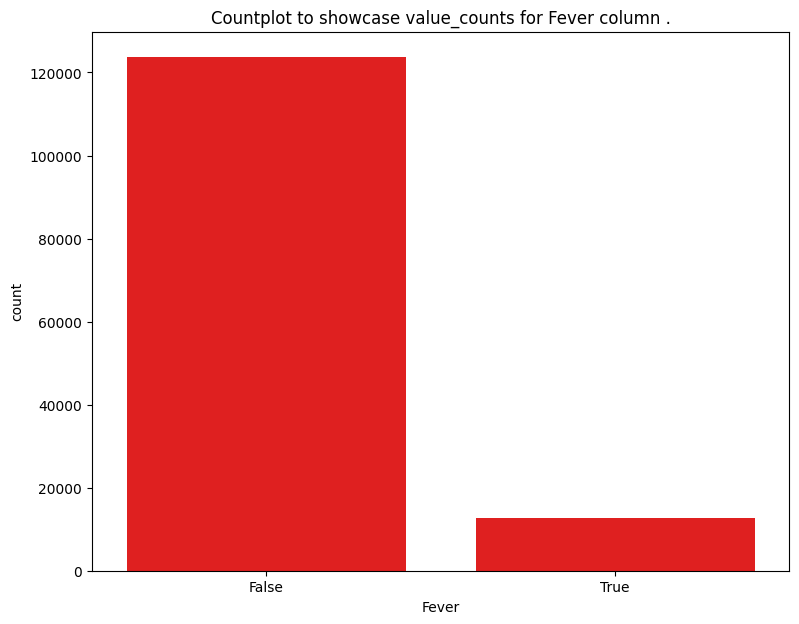

Fever
False    123633
True      12661
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Fever column .
Fever
False    90.710523
True      9.289477
Name: count, dtype: float64


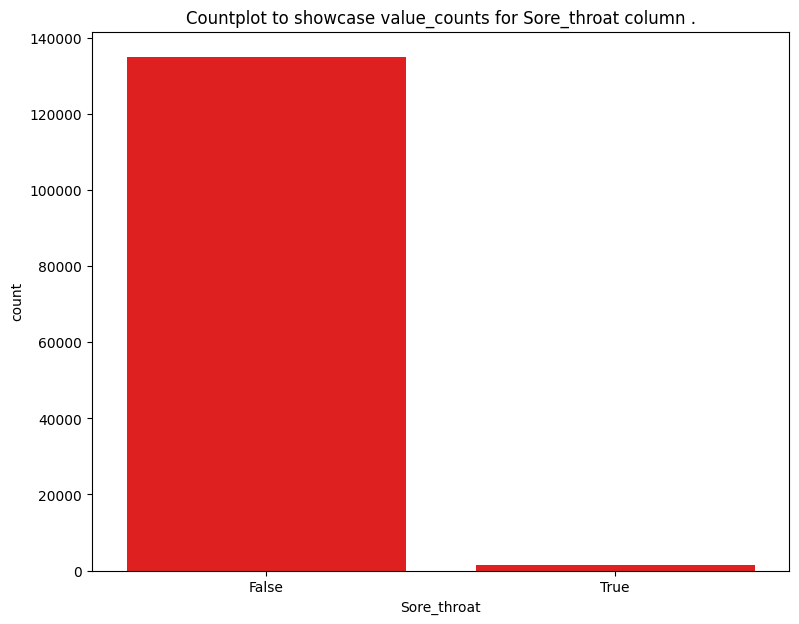

Sore_throat
False    134821
True       1473
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Sore_throat column .
Sore_throat
False    98.919248
True      1.080752
Name: count, dtype: float64


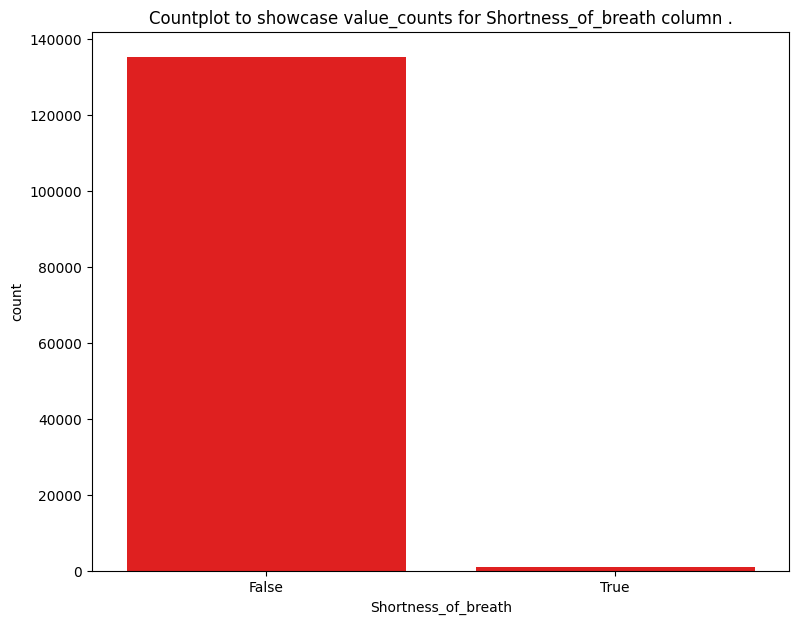

Shortness_of_breath
False    135233
True       1061
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Shortness_of_breath column .
Shortness_of_breath
False    99.221536
True      0.778464
Name: count, dtype: float64


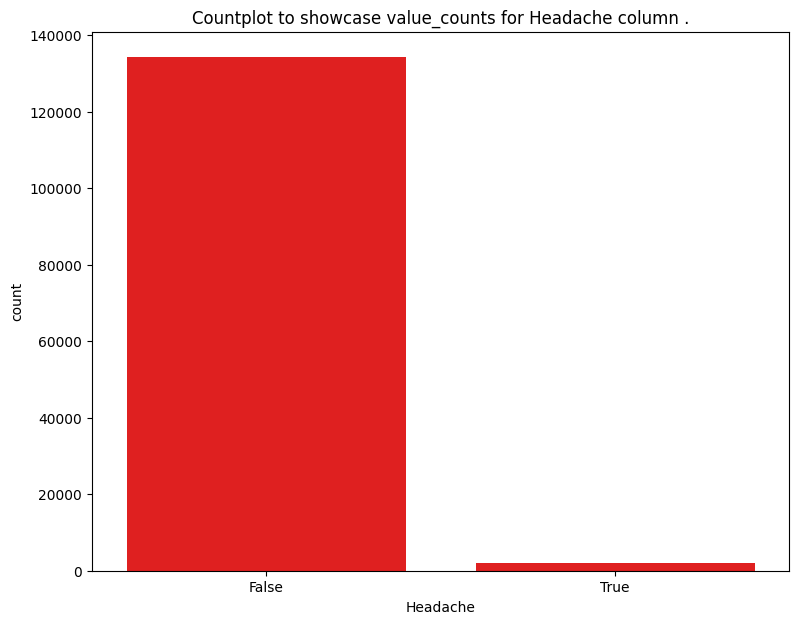

Headache
False    134219
True       2075
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Headache column .
Headache
False    98.477556
True      1.522444
Name: count, dtype: float64


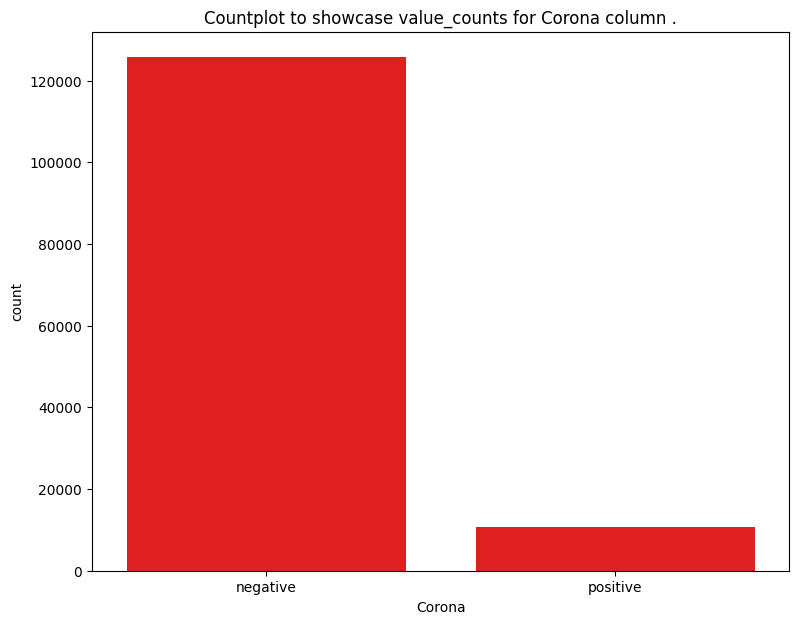

Corona
negative    125668
positive     10626
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Corona column .
Corona
negative    92.203619
positive     7.796381
Name: count, dtype: float64


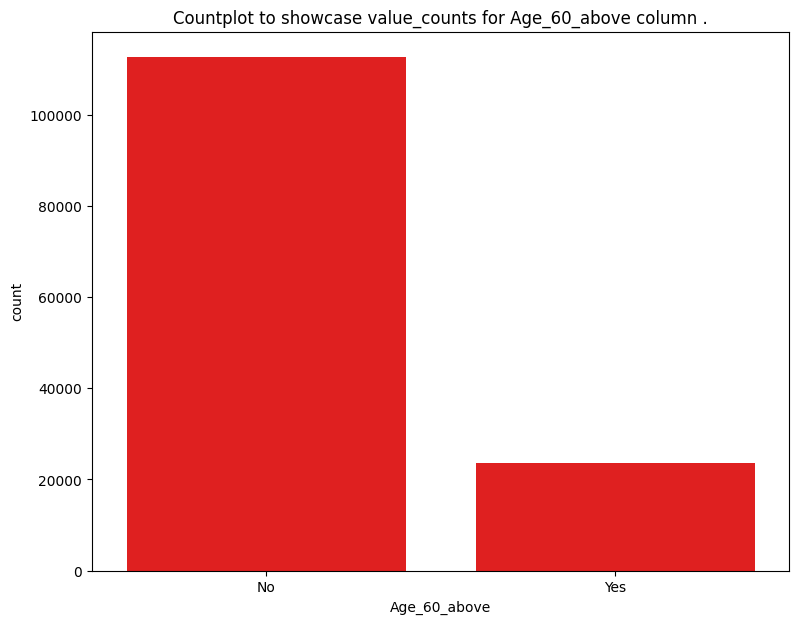

Age_60_above
No     112593
Yes     23701
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Age_60_above column .
Age_60_above
No     82.610386
Yes    17.389614
Name: count, dtype: float64


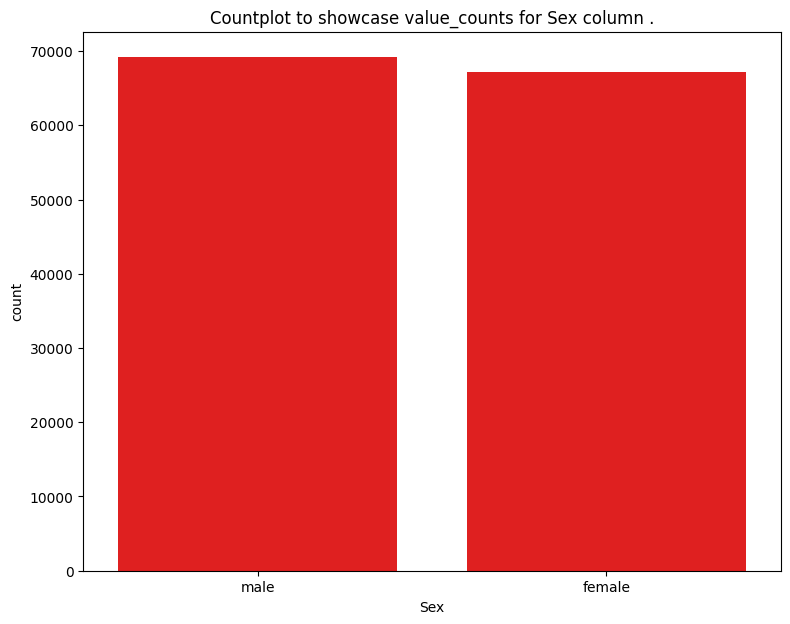

Sex
male      69153
female    67141
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Sex column .
Sex
male      50.73811
female    49.26189
Name: count, dtype: float64


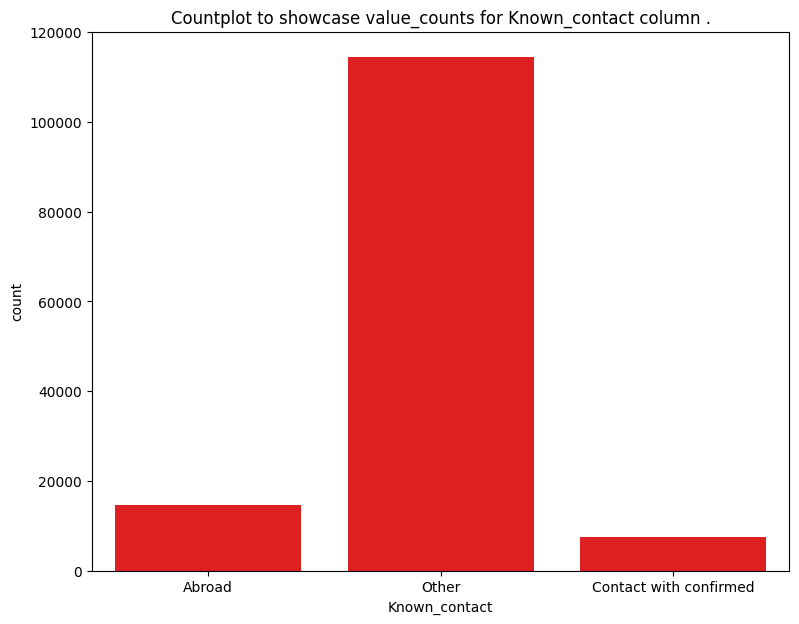

Known_contact
Other                     114358
Abroad                     14534
Contact with confirmed      7402
Name: count, dtype: int64
Below we can see the percentage of each distinct values for Known_contact column .
Known_contact
Other                     83.905381
Abroad                    10.663712
Contact with confirmed     5.430907
Name: count, dtype: float64


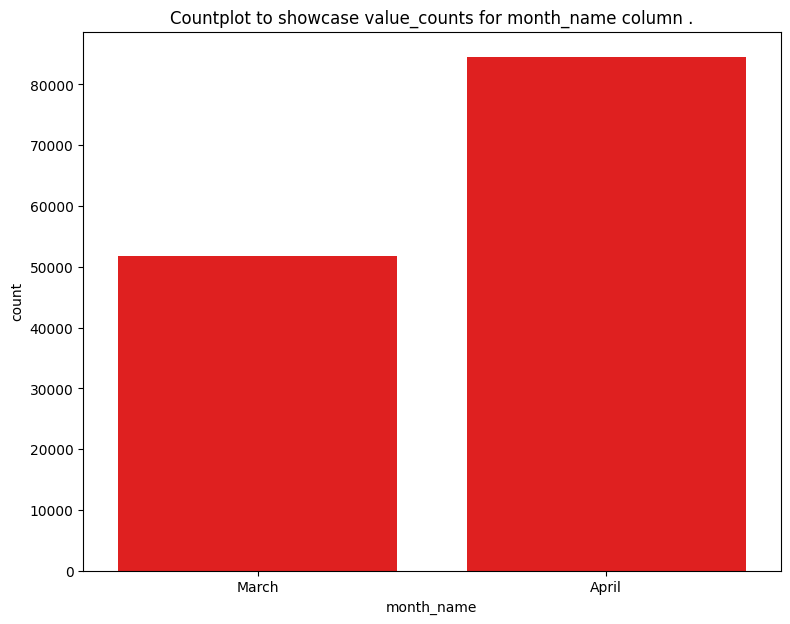

month_name
April    84480
March    51814
Name: count, dtype: int64
Below we can see the percentage of each distinct values for month_name column .
month_name
April    61.983653
March    38.016347
Name: count, dtype: float64


In [ ]:
for i in covid_new.columns :
  plt.figure(figsize=(9,7)) ## figsize will set the size of each visualization plot .
  sns.countplot(data=covid_new,x=i,color='red')
  plt.title(f"Countplot to showcase value_counts for {i} column .") ## title will set the title for each visualization .
  plt.show()
  print(covid_new[i].value_counts())
  print(f"Below we can see the percentage of each distinct values for {i} column .")
  print((covid_new[i].value_counts()*100)/len(covid_new[i]))

**Data visulization insights :**

Symptoms like Cough_symptoms and Fever are in present in 18.23% and 9.28% people .

Very very less amount of people have Headache, Shortness_of_breath and Sore_throat as symptoms .

In overall dataset only 7.79% people are covid positive and 92.20% are covid negative.

17.18 % People is older than 60 years .

The ratio between male and female is 50.73% and 49.26% which are almost same .

10.66% people went abroad and 5.43% people has contacted with confirm covid positive patients .

In march,2020 51814 test happens and in april,2020 84480 test had been done .

In [ ]:
T_F_columns=['Headache','Shortness_of_breath','Sore_throat','Fever','Cough_symptoms'] ## Creating a list columns which has boolean values of True False .

In [ ]:
Y_V_columns=['Age_60_above','Corona','Sex'] ## Creating a list columns which has only two distinct values .

In [ ]:
Male_covid=covid[covid.Sex=='male'] ## filtering rows based on male .
Male_covid.shape ## shape function will show total no of rows and columns .

(69153, 15)

In [ ]:
Female_covid=covid[covid.Sex=='female'] ## filtering rows based on female .
Female_covid.shape ## shape function will show total no of rows and columns .

(67141, 15)

In [ ]:
print("Total number of cases where the Gender is Male :\n" , len(Male_covid)) ## len function will show the total no of datapoints .
print("Total percentage of Positive negative cases in male :\n" ,(Male_covid.Corona.value_counts()*100)/len(Male_covid))

Total number of cases where the Gender is Male :
 69153
Total percentage of Positive negative cases in male :
 Corona
negative    91.304788
positive     8.695212
Name: count, dtype: float64


In [ ]:
print("Total number of cases where the Gender is Female :\n" , len(Female_covid)) ## len function will show the total no of datapoints .
print("Total percentage of Positive negative cases in female :\n" ,(Female_covid.Corona.value_counts()*100)/len(Female_covid))

Total number of cases where the Gender is Female :
 67141
Total percentage of Positive negative cases in female :
 Corona
negative    93.129384
positive     6.870616
Name: count, dtype: float64


Positive covid cases in male and female :    

Males are more prone to be covid positive than female . males have positivity rate of 8.70 % when female have 6.87 % positivity rate .

In [ ]:
## Filtering rows based on month of march and april .
covid_march=covid[covid.month_name=='March']
print(covid_march.shape) ## shape function will show total no of rows and columns .
covid_april=covid[covid.month_name=='April']
print(covid_april.shape) ## shape function will show total no of rows and columns .

(51814, 15)
(84480, 15)


In [ ]:
## Calculating the Percentage of Corona positive and negative by using the below method .
april_corona=(covid_april.Corona.value_counts()*100)/len(covid_april)
april_corona

Corona
negative    93.056345
positive     6.943655
Name: count, dtype: float64

In [ ]:
## Calculating the Percentage of Corona positive and negative by using the below method .
march_corona=(covid_march.Corona.value_counts()*100/len(covid_march))
march_corona

Corona
negative    90.813294
positive     9.186706
Name: count, dtype: float64

In [ ]:
## Using plotly express barplot for visualization .
fig=px.bar(march_corona,y='count',width=650,height=650,
           title='Percentage of covid positive and negative in March,2020',
           labels={'count':'Percentage'})
fig.show()

In [ ]:
## Using plotly express barplot for visualization .
fig=px.bar(april_corona,y='count',height=600,width=650,
           title='Percentage of covid positive and negative in April,2020',
           labels={'count':'Percentage'})
fig.show()

In march,2020 we have a positivity rate of 9.18% and in april,2020
the positivity rate drops to 6.94 % which is a significant drop .

In [ ]:
corona_test_days=covid.Test_day.value_counts() ## value_counts() will show the total count for each distinct value .
corona_test_days

Test_day
1     8371
2     7973
3     7609
13    7563
5     7267
31    6988
14    6426
26    6065
30    5811
7     5755
27    5730
12    5485
10    5484
28    5383
25    5300
6     5255
29    5155
4     4945
24    4576
9     4297
11    4163
8     3887
22    3470
23    3336
Name: count, dtype: int64

In [ ]:
## Using plotly express barplot for visualization .
fig=px.bar(corona_test_days,y='count',width=750,height=600,
           title='Total no of tests in each day',labels={'count':'Total_cases'})
fig.show()

We have records of 1-14th day and then we have no testing records between 15-21st and then again we have recors from 22-31st day .

In [ ]:
covid.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_day,Test_month,Year,month_name
13727,13728,2020-03-22,True,False,False,False,False,negative,No,male,Abroad,22,3,2020,March
13728,13729,2020-03-22,True,False,False,False,False,negative,No,female,Abroad,22,3,2020,March
13730,13731,2020-03-22,True,True,False,False,False,positive,Yes,female,Other,22,3,2020,March
13734,13735,2020-03-22,False,False,False,False,False,negative,No,male,Other,22,3,2020,March
13735,13736,2020-03-22,False,False,False,False,False,negative,No,female,Other,22,3,2020,March


In [ ]:
## Using filter method to fetch the matching rows . '&' is used when we create a and filter .
age_60_symptoms=covid[(covid['Age_60_above']=='Yes')&(covid['Cough_symptoms']==True)&(covid['Fever']==True)]
age_60_symptoms.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_day,Test_month,Year,month_name
13730,13731,2020-03-22,True,True,False,False,False,positive,Yes,female,Other,22,3,2020,March
13748,13749,2020-03-22,True,True,False,False,False,positive,Yes,male,Abroad,22,3,2020,March
13752,13753,2020-03-22,True,True,False,False,False,positive,Yes,male,Contact with confirmed,22,3,2020,March
13776,13777,2020-03-22,True,True,False,False,False,positive,Yes,female,Abroad,22,3,2020,March
13835,13836,2020-03-22,True,True,False,True,True,positive,Yes,male,Abroad,22,3,2020,March


In [ ]:
print("Total cases where age is more than 60 and Fever and Cough symptoms are present :", len(age_60_symptoms)) ## len function will show the total no of datapoints .
print("Percentage of negative and positive cases where age is above 60 and Fever and Cough_symptoms are present :\n", (age_60_symptoms.Corona.value_counts()*100)/len(age_60_symptoms))

Total cases where age is more than 60 and Fever and Cough symptoms are present : 1487
Percentage of negative and positive cases where age is above 60 and Fever and Cough_symptoms are present :
 Corona
negative    59.045057
positive    40.954943
Name: count, dtype: float64


In [ ]:
## Using filter method to fetch the matching rows . '&' is used when we create a and filter .
age_below60_symptoms=covid[(covid['Age_60_above']=='No')&(covid['Cough_symptoms']==True)&(covid['Fever']==True)]
age_below60_symptoms.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_day,Test_month,Year,month_name
13751,13752,2020-03-22,True,True,False,False,False,negative,No,male,Abroad,22,3,2020,March
13755,13756,2020-03-22,True,True,True,False,True,negative,No,female,Abroad,22,3,2020,March
13756,13757,2020-03-22,True,True,True,True,False,negative,No,female,Abroad,22,3,2020,March
13759,13760,2020-03-22,True,True,False,True,False,negative,No,male,Other,22,3,2020,March
13765,13766,2020-03-22,True,True,False,False,False,positive,No,male,Contact with confirmed,22,3,2020,March


In [ ]:
print("Total cases where age is below 60 and Fever and Cough_symptoms are present :", len(age_below60_symptoms)) ## len function will show the total no of datapoints .
print("Percentage of positive and negative cases where age is below 60 and Fever and Cough_symptoms are present :\n", (age_below60_symptoms.Corona.value_counts()*100)/len(age_below60_symptoms))

Total cases where age is below 60 and Fever and Cough_symptoms are present : 7618
Percentage of positive and negative cases where age is below 60 and Fever and Cough_symptoms are present :
 Corona
negative    71.396692
positive    28.603308
Name: count, dtype: float64


When a person has symptoms of Fever and Cough_symptoms but their age is less than 60 then they had a positivity rate of 28.60 but when the age is above 60 then the positivity rate gone upto 41 % . so old age is a major factor in covid positive patients .

In [ ]:
## Using filter method to fetch the matching rows . '|' is used when we create a or filter .
abroad_contact=covid[(covid['Known_contact']=='Contact with confirmed') | (covid['Known_contact']=='Abroad')]
abroad_contact.shape ## shape function will show total no of rows and columns .

(21936, 15)

In [ ]:
print("Percentage of positive and negative when patient had contacted with a confirmed positive or went abroad :\n" ,(abroad_contact.Corona.value_counts()*100)/len(abroad_contact))

Percentage of positive and negative when patient had contacted with a confirmed positive or went abroad :
 Corona
0    70.295405
1    29.704595
Name: count, dtype: float64


It is clearly shown that people who went abroad or contacted with a confirmed covid positive patient had 29.70 Positivity rate which is much higher than normal .

In [ ]:
## covid.to_csv(r"C:\Users\soumyadip\Desktop\Sql_odin_credit",index=True,header=True)

In [ ]:
covid.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_day,Test_month,Year,month_name
13727,13728,2020-03-22,True,False,False,False,False,negative,No,male,Abroad,22,3,2020,March
13728,13729,2020-03-22,True,False,False,False,False,negative,No,female,Abroad,22,3,2020,March
13730,13731,2020-03-22,True,True,False,False,False,positive,Yes,female,Other,22,3,2020,March
13734,13735,2020-03-22,False,False,False,False,False,negative,No,male,Other,22,3,2020,March
13735,13736,2020-03-22,False,False,False,False,False,negative,No,female,Other,22,3,2020,March


In [ ]:
T_F_columns ## columns will show us all the columns of our dataframe .

['Headache', 'Shortness_of_breath', 'Sore_throat', 'Fever', 'Cough_symptoms']

In [ ]:
covid['Cough_symptoms']=np.where(covid['Cough_symptoms']==True,1,0) ## Converting True as 1 and False as 0 with np.where function .

In [ ]:
covid['Fever']=np.where(covid['Fever']==True,1,0) ## Converting True as 1 and False as 0 with np.where function .

In [ ]:
covid['Sore_throat']=np.where(covid['Sore_throat']==True,1,0) ## Converting True as 1 and False as 0 with np.where function .

In [ ]:
covid['Shortness_of_breath']=np.where(covid['Shortness_of_breath']==True,1,0) ## Converting True as 1 and False as 0 with np.where function .

In [ ]:
covid['Headache']=np.where(covid['Headache']==True,1,0) ## Converting True as 1 and False as 0 with np.where function .

In [ ]:
covid.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_day,Test_month,Year,month_name
13727,13728,2020-03-22,1,0,0,0,0,negative,No,male,Abroad,22,3,2020,March
13728,13729,2020-03-22,1,0,0,0,0,negative,No,female,Abroad,22,3,2020,March
13730,13731,2020-03-22,1,1,0,0,0,positive,Yes,female,Other,22,3,2020,March
13734,13735,2020-03-22,0,0,0,0,0,negative,No,male,Other,22,3,2020,March
13735,13736,2020-03-22,0,0,0,0,0,negative,No,female,Other,22,3,2020,March


In [ ]:
covid['Corona']=np.where(covid['Corona']=='positive',1,0) ## Converting the categorial values into 1 and 0 with np.where function .

In [ ]:
covid['Age_60_above']=np.where(covid['Age_60_above']=='Yes',1,0) ## Converting the categorial values into 1 and 0 with np.where function .

In [ ]:
covid['Sex']=np.where(covid['Sex']=='female',1,0) ## Converting the categorial values into 1 and 0 with np.where function .

In [ ]:
covid.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_day,Test_month,Year,month_name
13727,13728,2020-03-22,1,0,0,0,0,0,0,0,Abroad,22,3,2020,March
13728,13729,2020-03-22,1,0,0,0,0,0,0,1,Abroad,22,3,2020,March
13730,13731,2020-03-22,1,1,0,0,0,1,1,1,Other,22,3,2020,March
13734,13735,2020-03-22,0,0,0,0,0,0,0,0,Other,22,3,2020,March
13735,13736,2020-03-22,0,0,0,0,0,0,0,1,Other,22,3,2020,March


In [ ]:
## pd.get_dummies will convert all categorical columns into numeric ones and creating a new dataset with all those columns .
covid_2=pd.get_dummies(covid,columns=['Known_contact'],dtype=int)

In this project i have used 7 different ML algorithms to correctly predict Covid positive or negative . I have also tuned some of the algorithms to make it more robust and accurate.

Below i have mentioned all the algorithms and where i have used Hyperparameter tuning.

# ML algorithms :

1. Logistic Regression

2. DecisionTreeClassifier (Hyperparameter tuning)

3. RandomForestClassifier (Hyperparameter tuning)

4. KNearestNeighbors

5. xgboost (Hyperparameter tuning)

6. svm or support vector machine

7. Naive bayes or GaussianNB

In the end i have compared all the algorithms and commented on which will be best for which purpose .

In [ ]:
covid_2.head() ## head function will show us the top 5 rows .

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Test_day,Test_month,Year,month_name,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other
13727,13728,2020-03-22,1,0,0,0,0,0,0,0,22,3,2020,March,1,0,0
13728,13729,2020-03-22,1,0,0,0,0,0,0,1,22,3,2020,March,1,0,0
13730,13731,2020-03-22,1,1,0,0,0,1,1,1,22,3,2020,March,0,0,1
13734,13735,2020-03-22,0,0,0,0,0,0,0,0,22,3,2020,March,0,0,1
13735,13736,2020-03-22,0,0,0,0,0,0,0,1,22,3,2020,March,0,0,1


In [ ]:
covid_2.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

Ind_ID                                  0
Test_date                               0
Cough_symptoms                          0
Fever                                   0
Sore_throat                             0
Shortness_of_breath                     0
Headache                                0
Corona                                  0
Age_60_above                            0
Sex                                     0
Test_day                                0
Test_month                              0
Year                                    0
month_name                              0
Known_contact_Abroad                    0
Known_contact_Contact with confirmed    0
Known_contact_Other                     0
dtype: int64

In [ ]:
covid_2.shape ## shape function will show total no of rows and columns .

(136294, 17)

In [ ]:
covid_2=covid_2.drop(['Ind_ID','Test_date','month_name'],axis=1)
covid_2.head() ## head function will show us the top 5 rows .

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Test_day,Test_month,Year,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other
13727,1,0,0,0,0,0,0,0,22,3,2020,1,0,0
13728,1,0,0,0,0,0,0,1,22,3,2020,1,0,0
13730,1,1,0,0,0,1,1,1,22,3,2020,0,0,1
13734,0,0,0,0,0,0,0,0,22,3,2020,0,0,1
13735,0,0,0,0,0,0,0,1,22,3,2020,0,0,1


In [ ]:
covid_2.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
Index: 136294 entries, 13727 to 156039
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   Cough_symptoms                        136294 non-null  int64
 1   Fever                                 136294 non-null  int64
 2   Sore_throat                           136294 non-null  int64
 3   Shortness_of_breath                   136294 non-null  int64
 4   Headache                              136294 non-null  int64
 5   Corona                                136294 non-null  int64
 6   Age_60_above                          136294 non-null  int64
 7   Sex                                   136294 non-null  int64
 8   Test_day                              136294 non-null  int32
 9   Test_month                            136294 non-null  int32
 10  Year                                  136294 non-null  int32
 11  Known_contact_Abroad       

In [ ]:
X=covid_2.drop(['Corona'],axis=1) ## Creating X dataset for all the indipendent columns.
y=covid['Corona'] ## y is our target variable .

In [ ]:
## statsmodels.api shows us the p_value of each indipendent column .
## p_value shows whether the column is significant or not . If the p_value is less than 0.05 then the column is significant otherwise it is not that significant .
import statsmodels.api as sm
logit=sm.Logit(y,X)
model=logit.fit()
print(model.summary()) ## summary will show the pvalue and some other metric .

Optimization terminated successfully.
         Current function value: 0.148990
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 Corona   No. Observations:               136294
Model:                          Logit   Df Residuals:                   136281
Method:                           MLE   Df Model:                           12
Date:                Wed, 10 Apr 2024   Pseudo R-squ.:                  0.4558
Time:                        16:40:41   Log-Likelihood:                -20306.
converged:                       True   LL-Null:                       -37313.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Cough_symptoms                           0.0873      0.

In [ ]:
covid_2.columns ## columns will show us all the columns of our dataframe .

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Test_day', 'Test_month',
       'Year', 'Known_contact_Abroad', 'Known_contact_Contact with confirmed',
       'Known_contact_Other'],
      dtype='object')

After watching the p_values we can see that 4 columns which are 'Year', 'Known_contact_Abroad','Known_contact_Contact with confirmed',
'Known_contact_Other' has p value of 1 . but during data analysis i have got that abroad and people who had contacted with confirmed covid positives has a significant chance of getting covid positive . That's why i did not delete or drop these two columns .

In [ ]:
covid_2=covid_2.drop(['Known_contact_Other','Year'],axis=1) ## Dropping some unnecessary columns with drop function .

In [ ]:
X=covid_2.drop(['Corona'],axis=1) ## Creating X dataset for all the indipendent columns.
y=covid_2['Corona'] ## y is our target variable .

In [ ]:
## train_test_split will split the dataset into training and testing .
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=54) ## test_size=0.3 means 30% of datapoints will be kept for testing and others will be used for training .

In [ ]:
print(X_train.shape) ## shape function will show total no of rows and columns .
print(y_test.shape) ## shape function will show total no of rows and columns .

(95405, 11)
(40889,)


In [ ]:
## These are all the metrics for classification model which evaluates how good or accurate our model is .
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,classification_report

**Evaluation metrics in calssification model :**

1. accuracy_score : accuracy score is basically the ratio between Total_no_of_correct_predictions/Total no of datapoints .

2. confusion_matrix : confusion matrix not only shows total no of correct or wrong prediction but it also shows the number of True Positive , False Positive , True Negative and False Negative .

3. f1_score : This is a metric which is a harmonic mean between precision and recall.

4. classification report : classification_report shows avg_accuracy , avg f1_score , precision and recall score .

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
LR_pred=LR.predict(X_test) ## Predicting the model with X_test dataset .
LR_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this Logistic Regression model :", accuracy_score(y_test,LR_pred))
print("f1_score of this Logistic Regression model :", f1_score(y_test,LR_pred))
print("ro_auc_score of this Logistic Regression model :", roc_auc_score(y_test,LR_pred))

Accuracy_score of this Logistic Regression model : 0.9522365428354814
f1_score of this Logistic Regression model : 0.6329637286224393
ro_auc_score of this Logistic Regression model : 0.758720312835916


In [ ]:
print(confusion_matrix(y_test,LR_pred))

[[37252   457]
 [ 1496  1684]]


In [ ]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     37709
           1       0.79      0.53      0.63      3180

    accuracy                           0.95     40889
   macro avg       0.87      0.76      0.80     40889
weighted avg       0.95      0.95      0.95     40889



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
DC_pred=DC.predict(X_test) ## Predicting the model with X_test dataset .
DC_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this DecisionTree Classifier model :", accuracy_score(y_test,DC_pred))
print("f1_score of this DecisionTree Classifier model :", f1_score(y_test,DC_pred))
print("ro_auc_score of this DecisionTree Classifier model :", roc_auc_score(y_test,DC_pred))

Accuracy_score of this DecisionTree Classifier model : 0.9589131551272958
f1_score of this DecisionTree Classifier model : 0.6978417266187051
ro_auc_score of this DecisionTree Classifier model : 0.7991972955424452


In [ ]:
print(confusion_matrix(y_test,DC_pred))

[[37269   440]
 [ 1240  1940]]


In [ ]:
print(classification_report(y_test,DC_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37709
           1       0.82      0.61      0.70      3180

    accuracy                           0.96     40889
   macro avg       0.89      0.80      0.84     40889
weighted avg       0.96      0.96      0.96     40889



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
DC_params={'max_depth':[5,10,15],'min_samples_leaf':[6,9,12],
           'min_samples_split':[7,11,14]} ## Creating a pool of parameters from where we will get the best parameters for our model .
DC_grid=GridSearchCV(estimator=DC,param_grid=DC_params,refit=True,scoring='accuracy',verbose=1)
DC_grid.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
DC_grid.best_params_ ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 7}

In [ ]:
New_DC=DecisionTreeClassifier(max_depth=10,min_samples_leaf=9,min_samples_split=7,criterion='entropy')
New_DC.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
New_DC_pred=New_DC.predict(X_test) ## Predicting the model with X_test dataset .
New_DC_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this DecisionTree Classifier model after hyperparameter tuning :", accuracy_score(y_test,New_DC_pred))
print("f1_score of this DecisionTree Classifier model after hyperparameter tuning :", f1_score(y_test,New_DC_pred))
print("ro_auc_score of this DecisionTree Classifier model after hyperparameter tuning :", roc_auc_score(y_test,New_DC_pred))

Accuracy_score of this DecisionTree Classifier model after hyperparameter tuning : 0.960111521436083
f1_score of this DecisionTree Classifier model after hyperparameter tuning : 0.7089059432446903
ro_auc_score of this DecisionTree Classifier model after hyperparameter tuning : 0.8064697782472229


In [ ]:
print(confusion_matrix(y_test,New_DC_pred))

[[37272   437]
 [ 1194  1986]]


In [ ]:
print(classification_report(y_test,New_DC_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37709
           1       0.82      0.62      0.71      3180

    accuracy                           0.96     40889
   macro avg       0.89      0.81      0.84     40889
weighted avg       0.96      0.96      0.96     40889



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
RF_pred=RF.predict(X_test) ## Predicting the model with X_test dataset .
RF_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this RandomForest Classifier model :", accuracy_score(y_test,RF_pred))
print("f1_score of this RandomForest Classifier model :", f1_score(y_test,RF_pred))
print("ro_auc_score of this RandomForest Classifier model :", roc_auc_score(y_test,RF_pred))

Accuracy_score of this RandomForest Classifier model : 0.9599892391596762
f1_score of this RandomForest Classifier model : 0.7115655853314528
ro_auc_score of this RandomForest Classifier model : 0.8110106257268713


In [ ]:
print(confusion_matrix(y_test,RF_pred))

[[37235   474]
 [ 1162  2018]]


In [ ]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37709
           1       0.81      0.63      0.71      3180

    accuracy                           0.96     40889
   macro avg       0.89      0.81      0.85     40889
weighted avg       0.96      0.96      0.96     40889



In [ ]:
RF_params={'n_estimators':[8,12,16,20],'max_depth':[6,9,13,16],
           'criterion':['entropy','gini']} ## Creating a pool of parameters from where we will get the best parameters for our model .
RF_grid=GridSearchCV(estimator=RF,param_grid=RF_params,scoring='accuracy',refit=True,verbose=1)
RF_grid.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
RF_grid.best_params_ ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 20}

In [ ]:
New_RF=RandomForestClassifier(n_estimators=20,max_depth=9,criterion='gini')
New_RF.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
New_RF_pred=New_RF.predict(X_test) ## Predicting the model with X_test dataset .
New_RF_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this RandomForest Classifier model after hyperparameter tuning :", accuracy_score(y_test,New_RF_pred))
print("f1_score of this RandomForest Classifier model after hyperparameter tuning :", f1_score(y_test,New_RF_pred))
print("ro_auc_score of this RandomForest Classifier model after hyperparameter tuning :", roc_auc_score(y_test,New_RF_pred))

Accuracy_score of this RandomForest Classifier model after hyperparameter tuning : 0.9605761940864291
f1_score of this RandomForest Classifier model after hyperparameter tuning : 0.7031307550644568
ro_auc_score of this RandomForest Classifier model after hyperparameter tuning : 0.7956357656806151


In [ ]:
print(confusion_matrix(y_test,New_RF_pred))

[[37368   341]
 [ 1271  1909]]


In [ ]:
print(classification_report(y_test,New_RF_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37709
           1       0.85      0.60      0.70      3180

    accuracy                           0.96     40889
   macro avg       0.91      0.80      0.84     40889
weighted avg       0.96      0.96      0.96     40889



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
KNN.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
KNN_pred=KNN.predict(X_test) ## Predicting the model with X_test dataset .
KNN_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this KNeighborsClassifier model :", accuracy_score(y_test,KNN_pred))
print("f1_score of this KNeighborsClassifier model :", f1_score(y_test,KNN_pred))
print("ro_auc_score of this KNeighborsClassifier model :", roc_auc_score(y_test,KNN_pred))

Accuracy_score of this KNeighborsClassifier model : 0.9517474137298539
f1_score of this KNeighborsClassifier model : 0.6318342974435529
ro_auc_score of this KNeighborsClassifier model : 0.7597508835870055


In [ ]:
print(confusion_matrix(y_test,KNN_pred))

[[37223   486]
 [ 1487  1693]]


In [ ]:
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     37709
           1       0.78      0.53      0.63      3180

    accuracy                           0.95     40889
   macro avg       0.87      0.76      0.80     40889
weighted avg       0.95      0.95      0.95     40889



In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
xgb_pred=xgb_model.predict(X_test) ## Predicting the model with X_test dataset .
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this XGBoostClassifier model :", accuracy_score(y_test,xgb_pred))
print("f1_score of this XGBoostClassifier model :", f1_score(y_test,xgb_pred))
print("ro_auc_score of this XGBoostClassifier model :", roc_auc_score(y_test,xgb_pred))

Accuracy_score of this XGBoostClassifier model : 0.960967497370931
f1_score of this XGBoostClassifier model : 0.7185185185185186
ro_auc_score of this XGBoostClassifier model : 0.8142764952263535


In [ ]:
print(confusion_matrix(y_test,xgb_pred))

[[37256   453]
 [ 1143  2037]]


In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37709
           1       0.82      0.64      0.72      3180

    accuracy                           0.96     40889
   macro avg       0.89      0.81      0.85     40889
weighted avg       0.96      0.96      0.96     40889



In [ ]:
xgb_params={'n_estimators':[10,15,20,25],'gamma':[0.001,0.01,0.1,1],
            'learning_rate':[0.01,0.1,1,10]} ## Creating a pool of parameters from where we will get the best parameters for our model .
xgb_grid=GridSearchCV(estimator=xgb_model,param_grid=xgb_params,scoring='accuracy',refit=True,verbose=1)
xgb_grid.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
xgb_grid.best_params_ ## best_params_ will show us the best_parameters .

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'gamma': 1, 'learning_rate': 0.1, 'n_estimators': 25}

In [ ]:
New_xgb_model=xgb.XGBClassifier(n_estimators=25,gamma=1,learning_rate=0.1)
New_xgb_model.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
New_xgb_pred=New_xgb_model.predict(X_test) ## Predicting the model with X_test dataset .
New_xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this XGBoostClassifier model after hyperparameter tuning :", accuracy_score(y_test,New_xgb_pred))
print("f1_score of this XGBoostClassifier model after hyperparameter tuning :", f1_score(y_test,New_xgb_pred))
print("ro_auc_score of this XGBoostClassifier model after hyperparameter tuning :", roc_auc_score(y_test,New_xgb_pred))

Accuracy_score of this XGBoostClassifier model after hyperparameter tuning : 0.9605761940864291
f1_score of this XGBoostClassifier model after hyperparameter tuning : 0.7053016453382084
ro_auc_score of this XGBoostClassifier model after hyperparameter tuning : 0.7985152310869184


In [ ]:
print(confusion_matrix(y_test,New_xgb_pred))

[[37348   361]
 [ 1251  1929]]


In [ ]:
print(classification_report(y_test,New_xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     37709
           1       0.84      0.61      0.71      3180

    accuracy                           0.96     40889
   macro avg       0.90      0.80      0.84     40889
weighted avg       0.96      0.96      0.96     40889



In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
GNB_pred=GNB.predict(X_test) ## Predicting the model with X_test dataset .
GNB_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this Naivebayes or GaussianNB model :", accuracy_score(y_test,GNB_pred))
print("f1_score of this Naivebayes or GaussianNB model :", f1_score(y_test,GNB_pred))
print("ro_auc_score of this Naivebayes or GaussianNB model :", roc_auc_score(y_test,GNB_pred))

Accuracy_score of this Naivebayes or GaussianNB model : 0.9555137078431852
f1_score of this Naivebayes or GaussianNB model : 0.6919559695173582
ro_auc_score of this Naivebayes or GaussianNB model : 0.8121834810467647


In [ ]:
print(confusion_matrix(y_test,GNB_pred))

[[37027   682]
 [ 1137  2043]]


In [ ]:
print(classification_report(y_test,GNB_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     37709
           1       0.75      0.64      0.69      3180

    accuracy                           0.96     40889
   macro avg       0.86      0.81      0.83     40889
weighted avg       0.95      0.96      0.95     40889



In [ ]:
from sklearn import svm
svm_model=svm.SVC(C=0.1,kernel='rbf',gamma=0.1) ## C and gamma are parameters and kernel is the most important parameter in svm .
svm_model.fit(X_train,y_train) ## Fitting the model into X,y training dataset .
svm_pred=svm_model.predict(X_test) ## Predicting the model with X_test dataset .
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy_score of this svm or svmclassifier model :", accuracy_score(y_test,svm_pred))
print("f1_score of this svm or svmclassifier model :", f1_score(y_test,svm_pred))
print("ro_auc_score of this svm or svmclassifier model :", roc_auc_score(y_test,svm_pred))

Accuracy_score of this svm or svmclassifier model : 0.9550245787375577
f1_score of this svm or svmclassifier model : 0.6606384941871194
ro_auc_score of this svm or svmclassifier model : 0.7754930549752815


In [ ]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     37709
           1       0.80      0.56      0.66      3180

    accuracy                           0.96     40889
   macro avg       0.88      0.78      0.82     40889
weighted avg       0.95      0.96      0.95     40889



In [ ]:
print(confusion_matrix(y_test,svm_pred))

[[37260   449]
 [ 1390  1790]]


**Goal to Predict Covid Positive** **:**

If our project's goal is to find the highest percentage of covid positive then NaiveBayes or GaussianNB algorithm is giving us the best results . It has a recall score of 64.25% for predicting the covid positive correctly . Out of 3180 datapoints of covid positive NaiveBayes correctly classifies 2043 .


**Goal to Predict Covid Negative** **:**

If our project's goal is to find the highest percentage of covid negative then RandomForest Classifier ML algorithm with hyperparameter tuning giving us the best results . It has a recall score of 99.10% for predicting the covid negatives correctly . Out of 37709 datapoints of covid negative RandomForest Classifier correctly classifies 37368 .


**Most Balanced Model :**

A project of Machine Leraning can serve in many different ways . if our projects goal is not specific and we want that our model should provide the most balanced prediction then xgboost Ml algorithm is the most accurate . it has the highest accuracy score of 96.09 % among all . It gives a recall score of 64.05 % when it comes to predict the covid positive and 98.80% when it predict the Covid negative .


This project gives critical insights about covid-19 pandemic , analysing this humongous data and predicting manually is not possible . That is why Data science and Machine Learning conmes into picture and it can serve humanity in soo many different ways . This is a very very tiny attempt from me and i hope i had done some justice with this project .